In [1]:
from shapely import Polygon, is_valid, is_valid_reason
from shapely_polyskel import StraightSkeleton

# Some cases (WIP)

This notebook presents a number of cases which may cause some difficulties or problems in the use.

Note: There are certainly other exceptions not included in this notebook.

## Unacceptable polygons 

### Empty polygon

In [2]:
polygon = Polygon()

# ValueError: The polygon is empty. The skeleton can't be compute.
# StraightSkeleton(polygon)

### Invalid polygon
Examples of invalid polygons taken from: https://shapely.readthedocs.io/en/stable/manual.html#polygons

In [3]:
polygon = Polygon(
    [(0, 0), (0, 2), (2, 2), (2, 0)],
    [[(1, 0), (0, 1), (0.5, 1.5), (1.5, 0.5)]],
)

# ValueError: The polygon is invalid. The skeleton can't be compute.
# StraightSkeleton(polygon)

print(f"Is valid: {is_valid(polygon)}; Reason: {is_valid_reason(polygon)}")

Is valid: False; Reason: Interior is disconnected[1 0]


In [4]:
polygon = Polygon(
    [(0, 0), (0, 2), (2, 2), (2, 0)],
    [[(0.5, 0), (1.5, 0), (1.5, 1), (0.5, 1)]],
)
# StraightSkeleton(polygon)

print(f"Is valid: {is_valid(polygon)}; Reason: {is_valid_reason(polygon)}")

Is valid: False; Reason: Self-intersection[0.5 0]


In [5]:
ext = [(0, 0), (0, 2), (2, 2), (2, 0)]
int_1 = [(0.5, 0.25), (1.5, 0.25), (1.5, 1.25), (0.5, 1.25)]
int_2 = [(0.5, 1.25), (1, 1.25), (1, 1.75), (0.5, 1.75)]
polygon = Polygon(ext, [int_1, int_2])

# StraightSkeleton(polygon)

print(f"Is valid: {is_valid(polygon)}; Reason: {is_valid_reason(polygon)}")

Is valid: False; Reason: Self-intersection[0.5 1.25]


In [6]:
polygon = Polygon(
    [(0, 0), (0, 2), (2, 2), (2, 0)],
    [[(0.5, -1), (1.5, -1), (1.5, 1), (0.5, 1)]],
)
# StraightSkeleton(polygon)

print(f"Is valid: {is_valid(polygon)}; Reason: {is_valid_reason(polygon)}")

Is valid: False; Reason: Self-intersection[0.5 0]


## Unique ridges

### Regular polygon (Square)

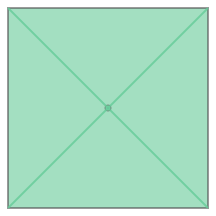

In [7]:
polygon = Polygon([(0, 0), (0, 200), (200, 200), (200, 0)])

straight_skeleton = StraightSkeleton(polygon)
ridges = straight_skeleton.ridges()  # POINT (100 100)

straight_skeleton

### Rectangle

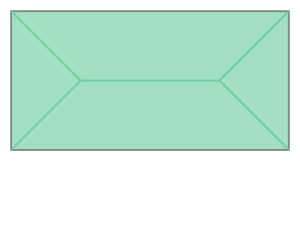

In [8]:
polygon = Polygon([(0, 0), (0, 200), (400, 200), (400, 0)])

straight_skeleton = StraightSkeleton(polygon)
ridges = straight_skeleton.ridges()  # LINESTRING (100 100, 300 100)

straight_skeleton

## T-Shapes

### T-Shape

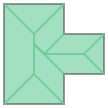

In [9]:
polygon = Polygon(
    [
        (0, 0),
        (0, 100),
        (60, 100),
        (60, 70),
        (100, 70),
        (100, 30),
        (60, 30),
        (60, 0),
    ]
)

straight_skeleton = StraightSkeleton(polygon)
straight_skeleton

### T-Shape hole

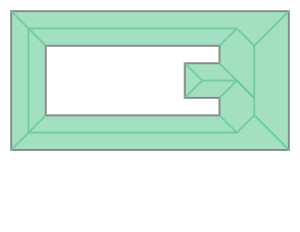

In [10]:
polygon = Polygon(
    [(0, 0), (0, 200), (400, 200), (400, 0)],
    [
        [
            (50, 50),
            (300, 50),
            (300, 75),
            (250, 75),
            (250, 125),
            (300, 125),
            (300, 150),
            (50, 150),
        ]
    ],
)


straight_skeleton = StraightSkeleton(polygon)
straight_skeleton